<a href="https://colab.research.google.com/github/NoelleI/AI-Experiments-Pigmentation/blob/master/post_process_pigmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/NoelleI/Pigmentation.git

Cloning into 'Pigmentation'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 724 (delta 44), reused 70 (delta 5), pack-reused 580
Receiving objects: 100% (724/724), 91.22 MiB | 27.67 MiB/s, done.
Resolving deltas: 100% (249/249), done.


In [3]:
!git clone https://github.com/NoelleI/Output.git

fatal: destination path 'Output' already exists and is not an empty directory.


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

from scipy import ndimage, misc
import re
import os
from datetime import datetime

import skimage
from skimage import transform

%matplotlib inline

pigs = []
masks = []
filenames_dict_pigs = {}
filenames_dict_masks = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:  
          b = re.search('d*w*mask.jpg', filename)
          
          if not b: #re.search('d*[^{r|f}].jpg', filename):
            
            n = re.match("(\d*)", filename)
            
            filenames_dict_pigs.update({int(n.group()): os.path.join(root, filename)})
          elif b:
            n = re.match("(\d*)", filename)
            filenames_dict_masks.update({int(n.group()): os.path.join(root, filename)})
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict_pigs.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict_pigs[key])
  image = skimage.transform.resize(image, (192,256,3))  
  mask =  plt.imread(filenames_dict_masks[key], )

  pigs+= [image]
  masks +=[mask]
  
pigs = np.asarray(pigs)
masks = np.asarray(masks)

In [14]:
masks.shape   ##assume it has this shape because of the format it was stored in -> maybe investigate later

(28, 192, 256, 3)

In [20]:
masks[0]

array([[[72,  8, 94],
        [72,  8, 94],
        [72,  8, 94],
        ...,
        [74,  6, 89],
        [75,  7, 90],
        [77,  9, 92]],

       [[72,  8, 94],
        [72,  8, 94],
        [72,  8, 94],
        ...,
        [69,  1, 84],
        [71,  3, 86],
        [73,  5, 88]],

       [[71,  7, 93],
        [71,  7, 93],
        [71,  7, 93],
        ...,
        [67,  0, 82],
        [69,  1, 84],
        [71,  3, 86]],

       ...,

       [[73,  5, 92],
        [69,  3, 90],
        [67,  1, 88],
        ...,
        [68,  3, 85],
        [69,  4, 86],
        [70,  5, 87]],

       [[75,  7, 94],
        [72,  4, 91],
        [68,  2, 89],
        ...,
        [70,  5, 87],
        [71,  6, 88],
        [71,  6, 88]],

       [[77,  9, 96],
        [74,  6, 93],
        [69,  3, 90],
        ...,
        [70,  5, 87],
        [71,  6, 88],
        [72,  7, 89]]], dtype=uint8)

In [0]:
def visual_progress():

  mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
  for i in range(len(masks)):
    mask = np.around(masks[i])
    


    image = pigs[i]
    plt.imshow(image)
    plt.show()
    notmask = 1- mask
    image2 = image*mask
    image1 = image*(1- mask)

    image2_avgr = np.average(image2[:,:,0], weights = mask[:,:,0])
    image2_avgg = np.average(image2[:,:,1], weights = mask[:,:,1]) 
    image2_avgb = np.average(image2[:,:,2], weights = mask[:,:,2])

    image1_avgr = np.average(image1[:,:,0], weights = notmask[:,:,0])
    image1_avgg = np.average(image1[:,:,1], weights = notmask[:,:,1]) 
    image1_avgb = np.average(image1[:,:,2], weights = notmask[:,:,2])


    if i==0:
      avgro= image2_avgr
      avggo = image2_avgg
      avgbo = image2_avgb

      navgro= image2_avgr
      navggo = image2_avgg
      navgbo = image2_avgb




    image2_avg = np.zeros(image2.shape)
    image1_avg = np.zeros(image1.shape)
    image2_avg[:,:,0] = image2_avgr
    image2_avg[:,:,1] = image2_avgg
    image2_avg[:,:,2] = image2_avgb

    image1_avg[:,:,0] = image1_avgr
    image1_avg[:,:,1] = image1_avgg
    image1_avg[:,:,2] = image1_avgb
#mask = 1-mask
#mask = mask.astype(int)
    plt.imshow(image2_avg)
    plt.show()
  
#image[mask] = 0

    plt.imshow(image1_avg)
    plt.show()

    plt.imshow(image2)
    plt.show()
    plt.imshow(image1)
    plt.show()

    print("next day..\n")
  return(avgro,avggo,avgbo,navgro,navggo,navgbo)

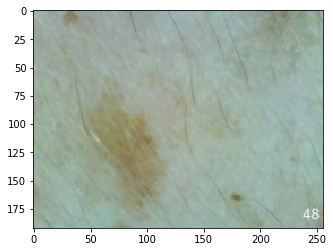

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


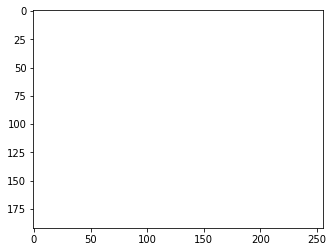

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


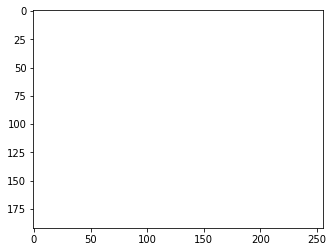

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


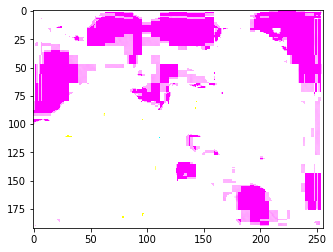

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


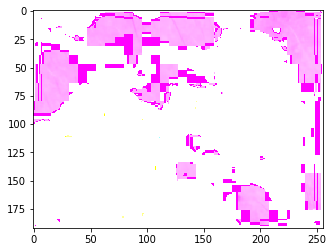

next day..



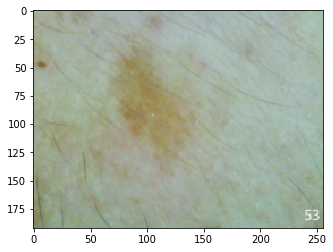

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


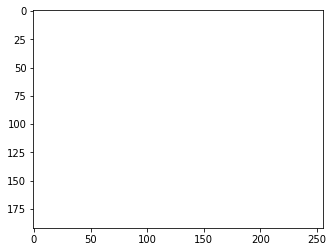

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


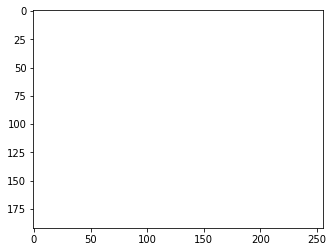

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


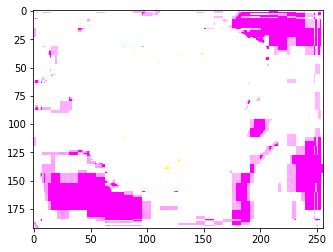

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


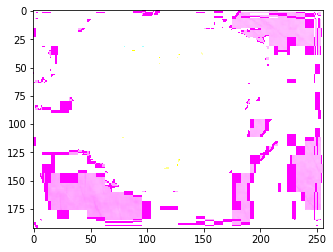

next day..



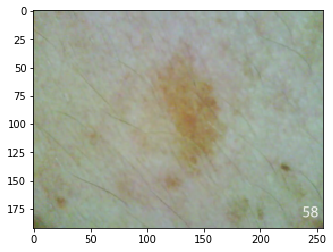

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


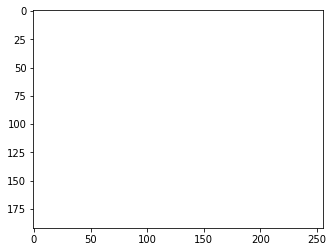

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


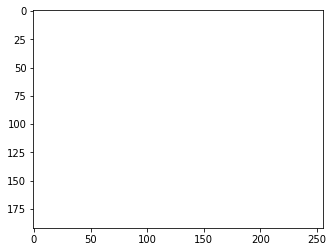

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


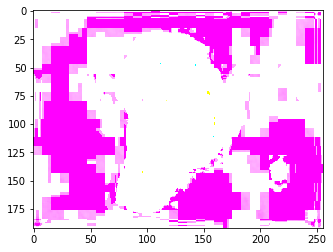

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


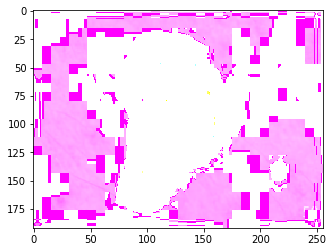

next day..



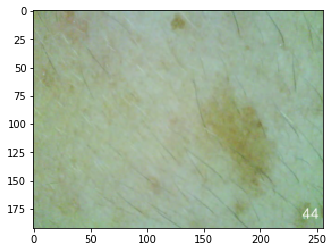

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


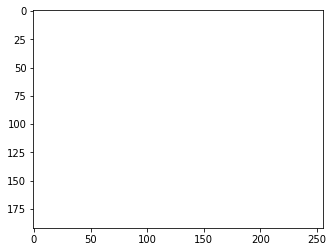

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


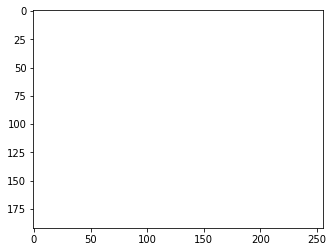

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


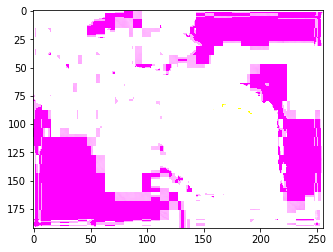

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


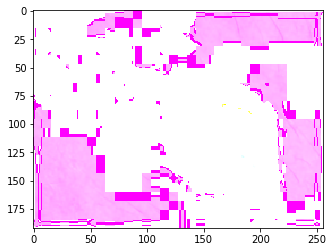

next day..



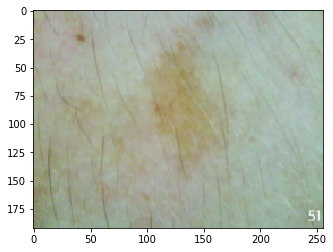

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


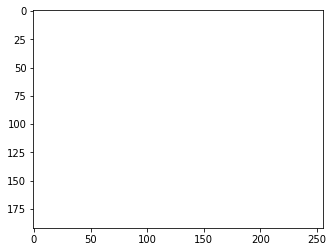

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


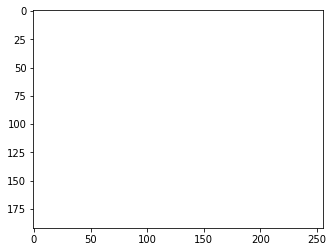

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


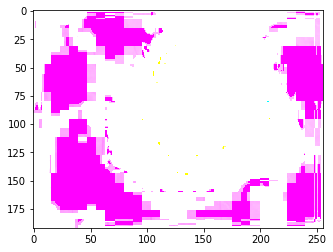

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


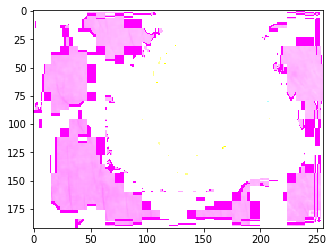

next day..



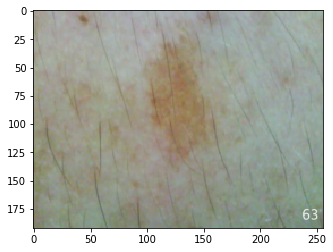

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


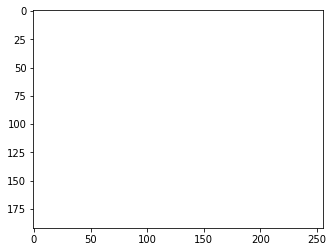

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


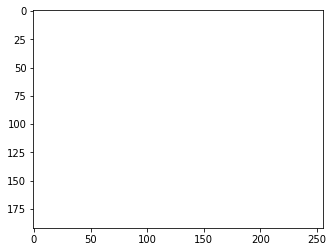

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


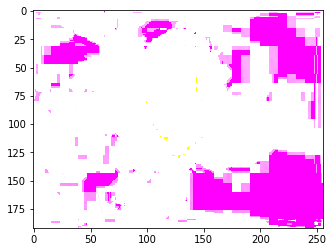

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


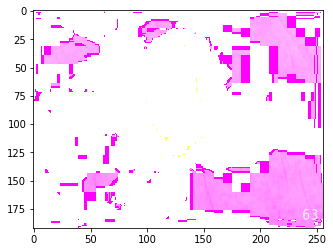

next day..



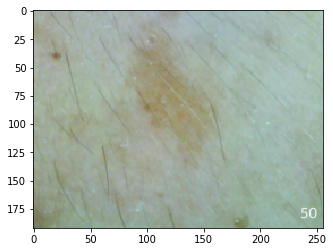

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


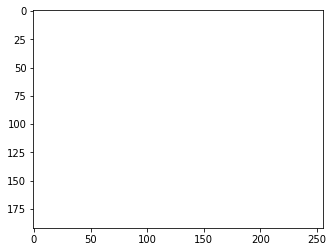

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


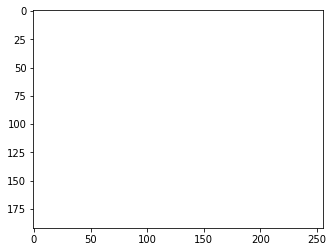

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


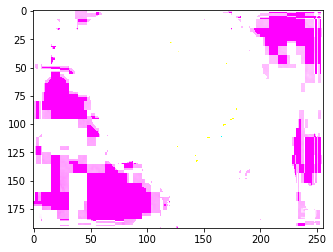

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


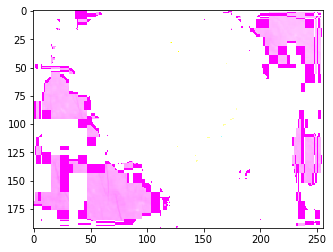

next day..



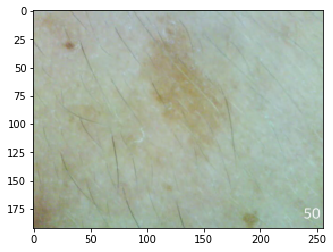

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


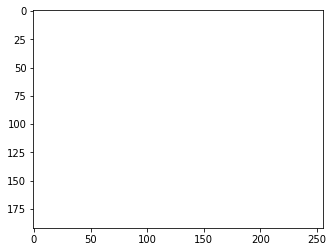

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


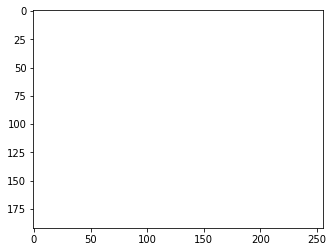

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


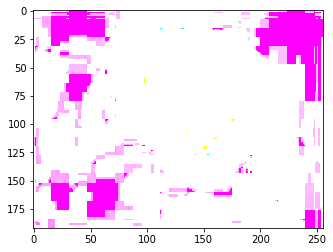

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


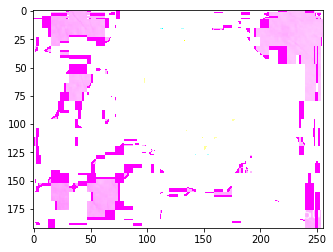

next day..



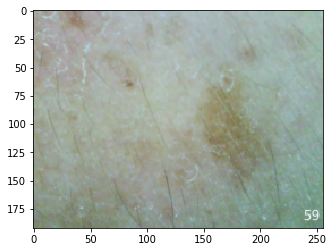

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


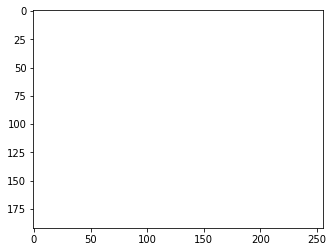

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


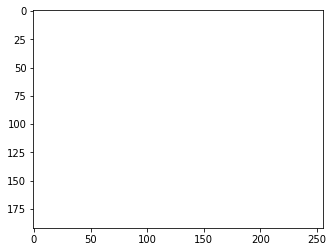

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


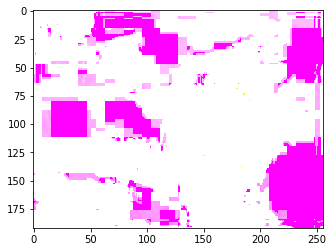

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


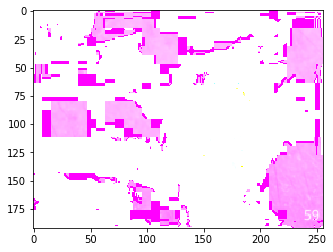

next day..



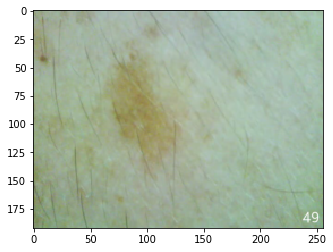

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


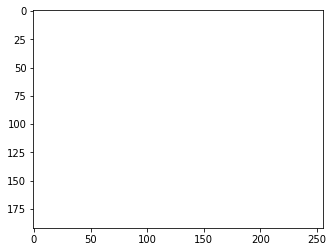

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


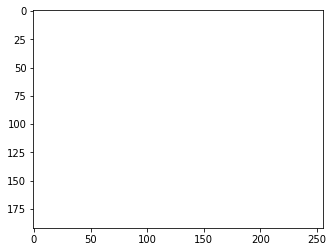

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


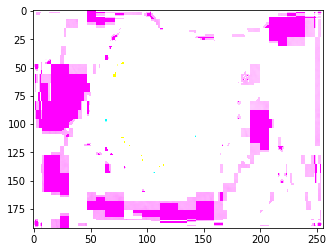

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


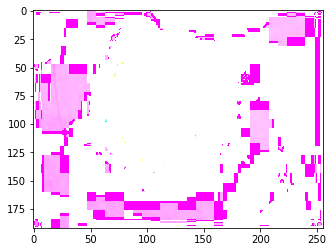

next day..



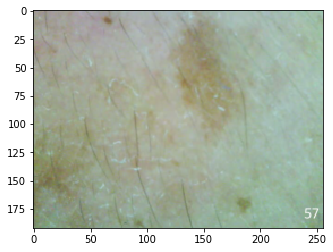

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


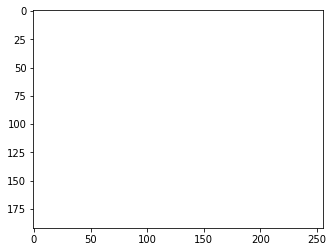

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


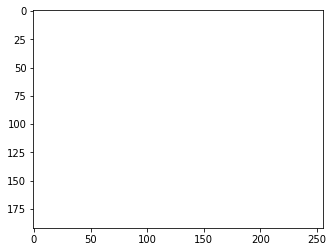

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


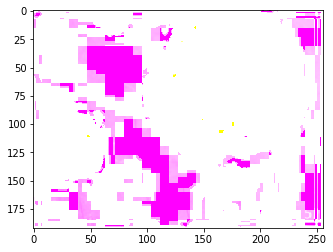

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


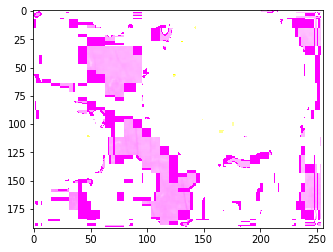

next day..



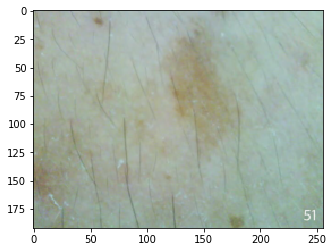

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


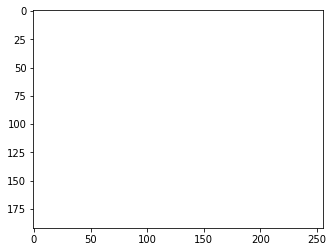

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


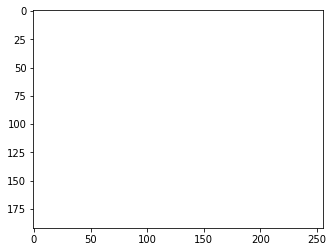

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


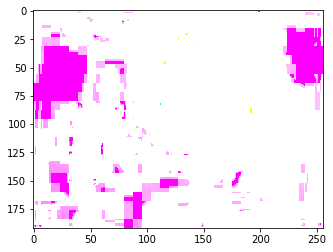

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


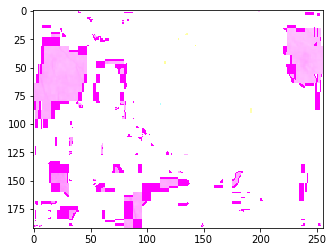

next day..



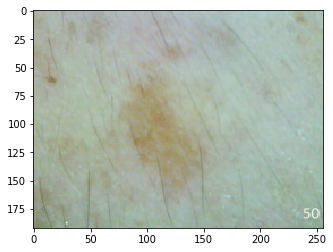

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


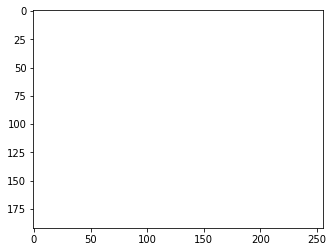

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


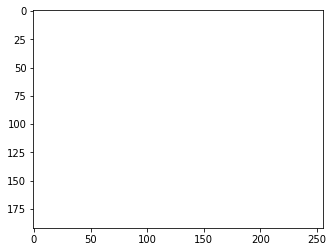

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


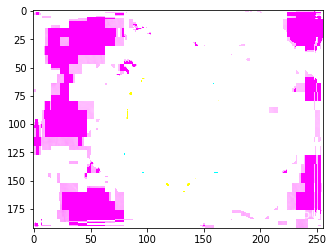

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


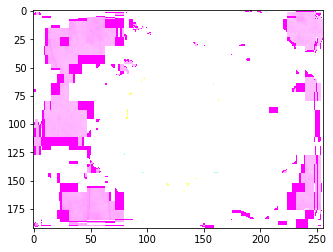

next day..



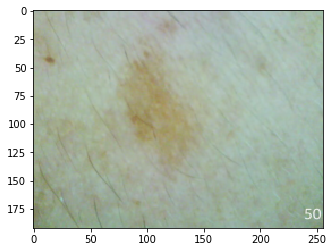

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


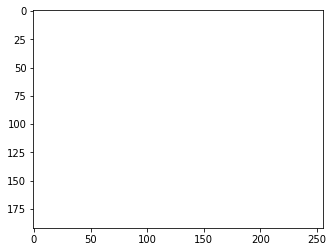

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


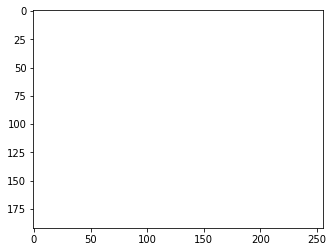

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


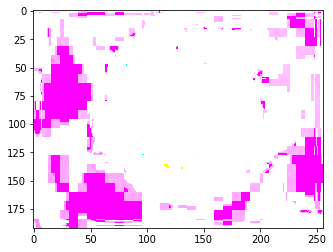

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


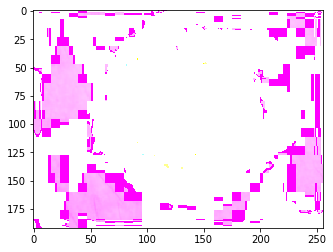

next day..



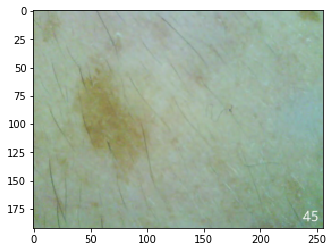

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


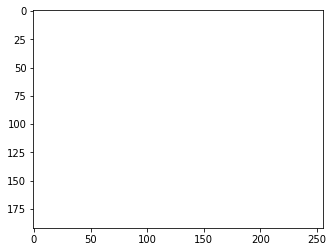

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


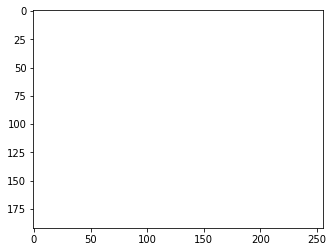

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


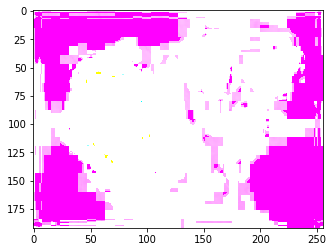

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


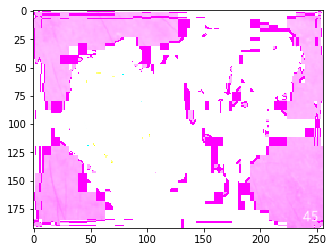

next day..



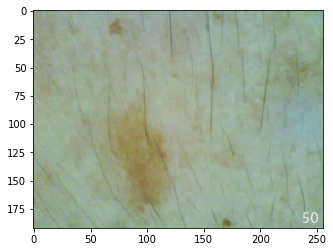

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


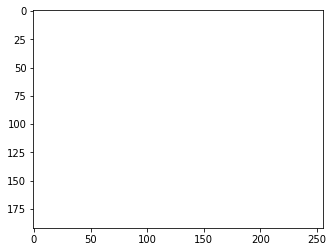

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


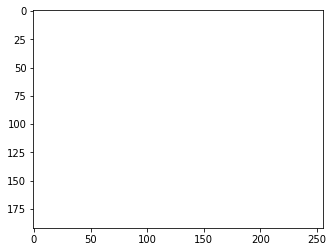

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


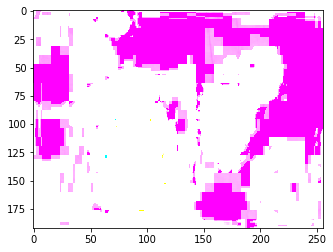

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


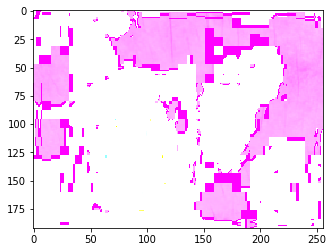

next day..



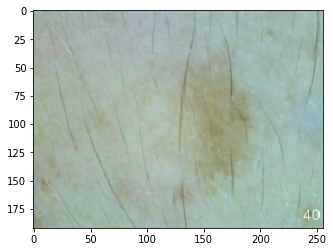

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


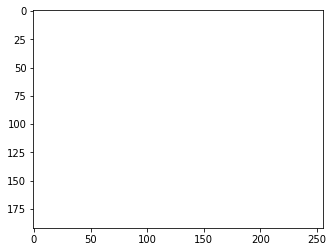

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


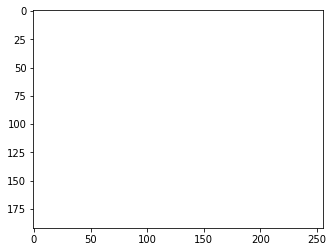

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


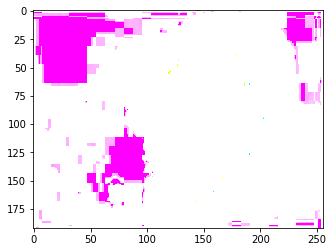

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


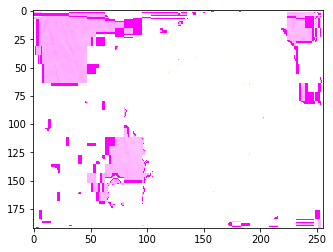

next day..



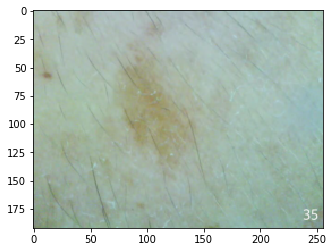

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


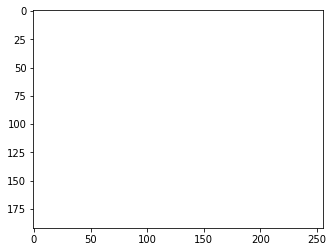

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


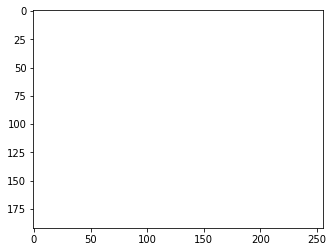

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


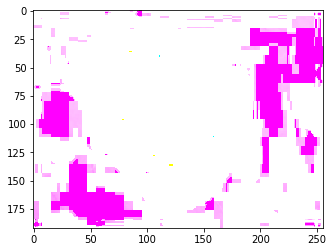

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


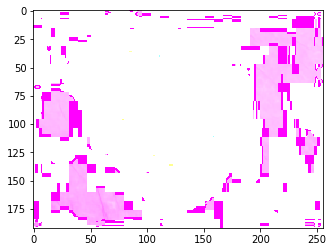

next day..



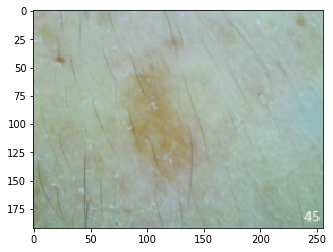

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


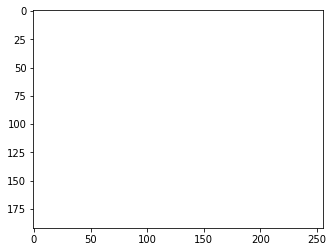

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


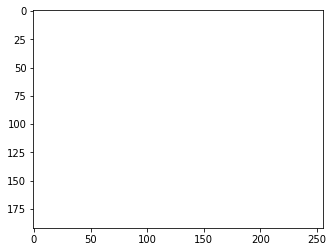

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


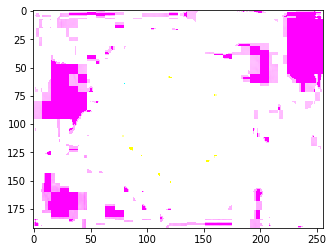

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


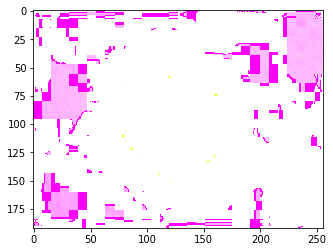

next day..



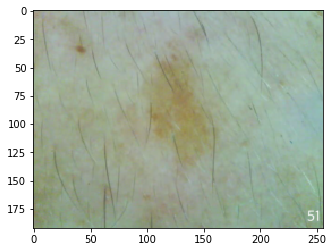

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


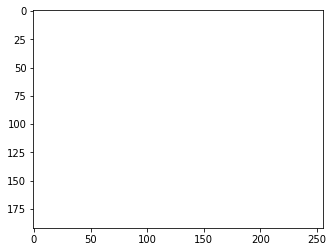

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


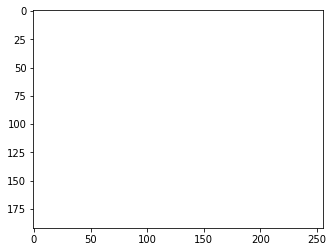

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


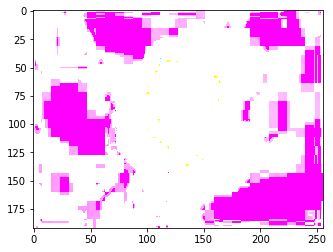

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


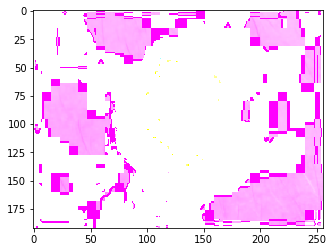

next day..



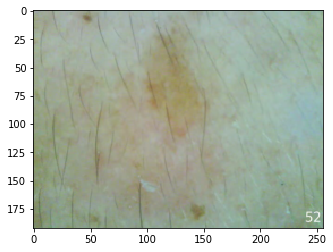

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


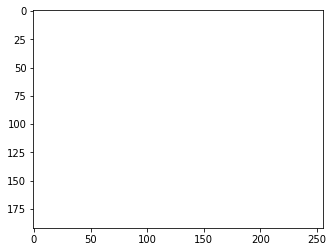

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


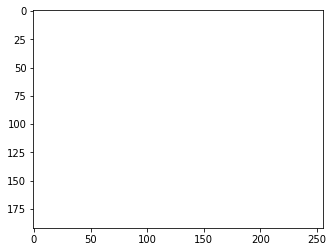

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


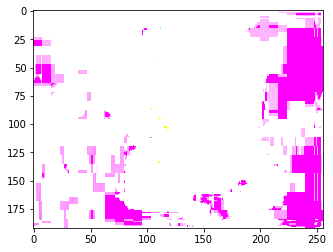

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


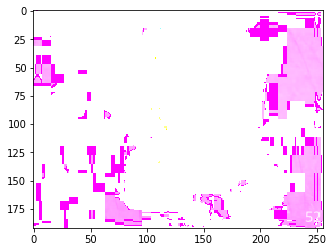

next day..



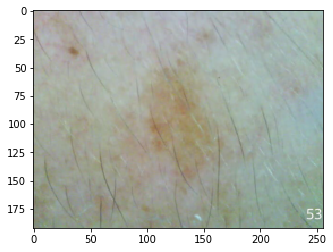

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


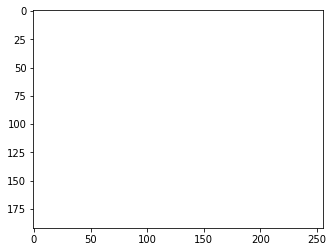

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


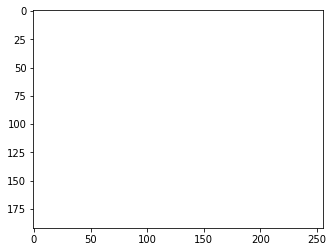

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


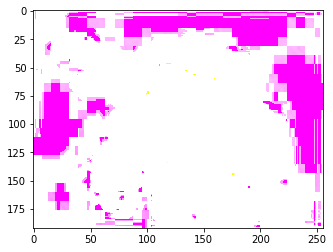

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


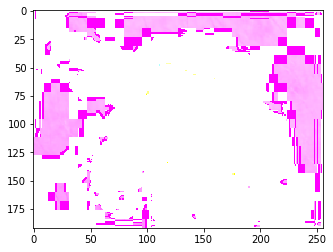

next day..



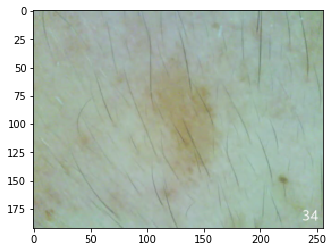

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


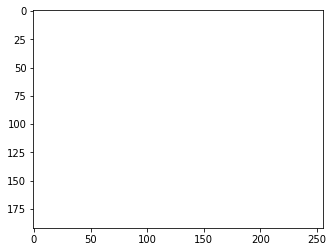

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


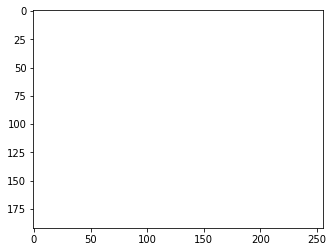

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


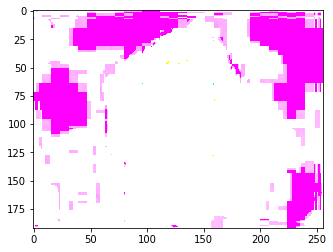

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


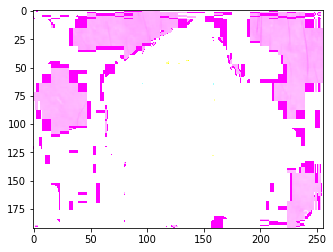

next day..



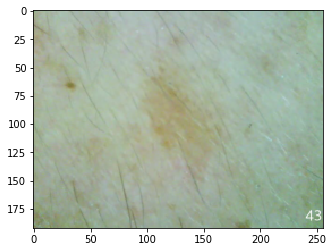

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


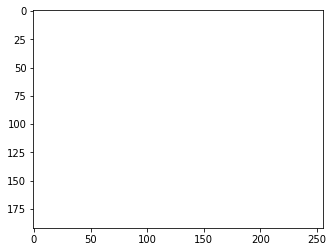

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


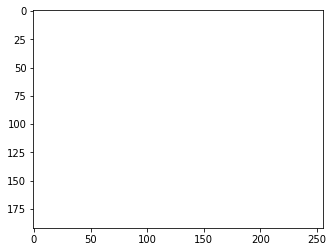

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


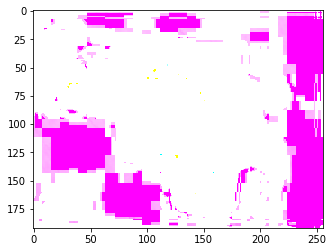

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


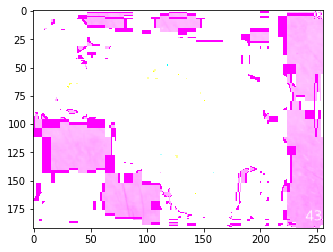

next day..



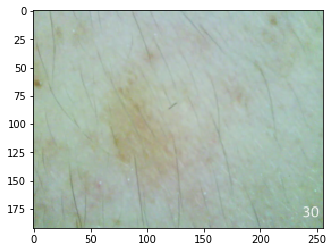

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


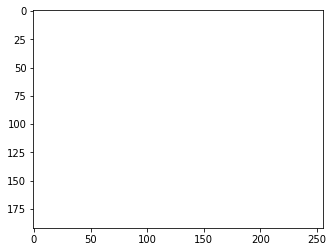

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


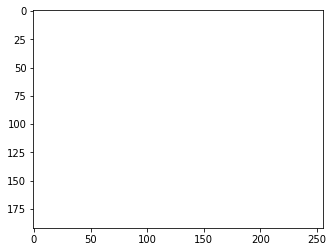

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


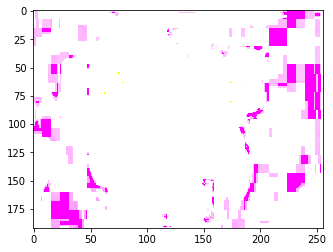

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


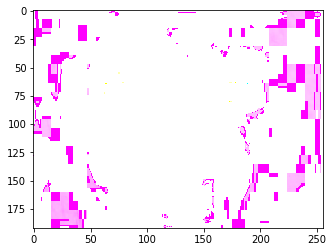

next day..



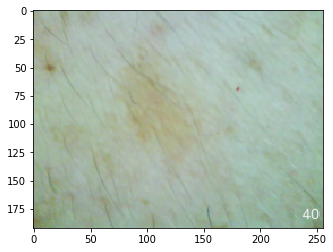

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


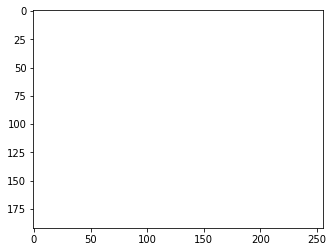

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


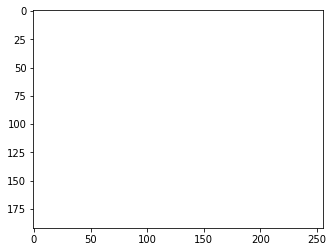

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


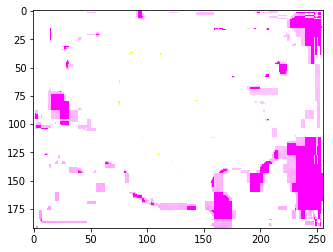

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


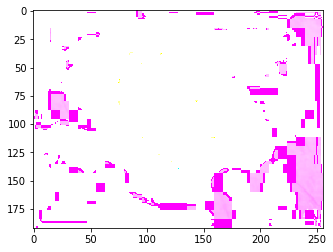

next day..



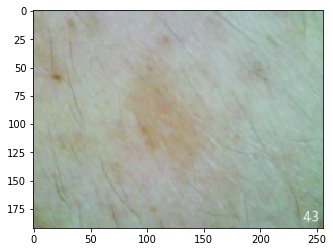

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


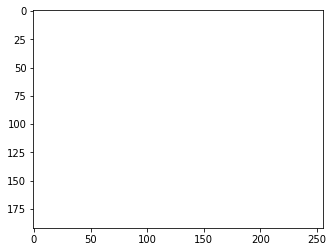

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


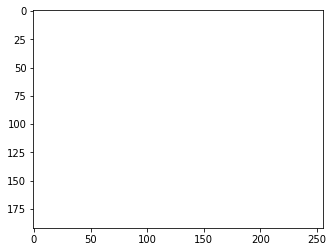

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


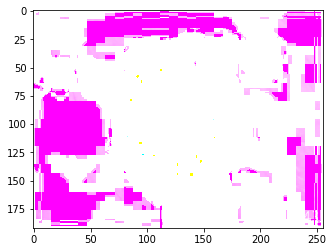

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


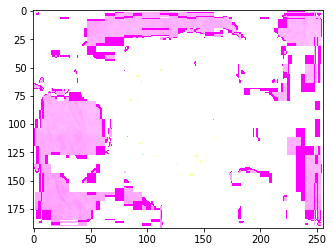

next day..



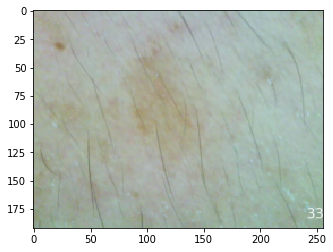

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


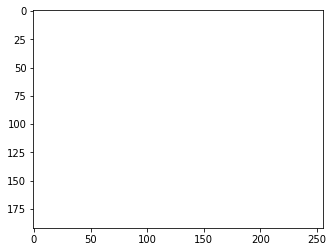

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


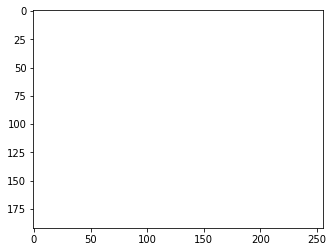

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


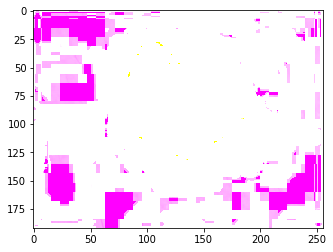

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


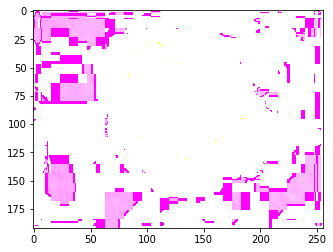

next day..



In [19]:
avgro, avggo, avgbo, navgro, navggo, navgbo  = visual_progress()